<a href="https://colab.research.google.com/github/rahulns86/Datasets/blob/master/Analyzing_Financial_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Developing a machine learning algorithm to analyze financial reports involves several steps. Below is a high-level overview of the process:

1. **Data Collection**
Financial Reports: Collect financial reports from various sources. This can include balance sheets, income statements, and cash flow statements.
Market Data: Collect relevant market data, such as stock prices, interest rates, and economic indicators.
Other Data Sources: Collect additional data that might influence financial performance, such as news articles, social media sentiment, and industry reports.

2. **Data Preprocessing**
Data Cleaning: Handle missing values, outliers, and inconsistencies in the data.
Normalization: Normalize the data to ensure that features are on a similar scale.**bold text**
Feature Engineering: Create new features that might be useful for the model, such as financial ratios (e.g., P/E ratio, ROE, ROA).

3. **Exploratory Data Analysis (EDA)**
Statistical Analysis: Perform statistical analysis to understand the distribution of the data.
Visualization: Use visualization techniques to identify patterns and relationships in the data.

4. **Model Selection**
Supervised Learning: If the goal is to predict a specific outcome (e.g., stock price prediction, credit scoring), supervised learning algorithms like regression models, decision trees, random forests, or neural networks can be used.
Unsupervised Learning: If the goal is to identify patterns or clusters in the data (e.g., segmenting companies based on financial performance), unsupervised learning algorithms like k-means clustering or PCA (Principal Component Analysis) can be used.
Natural Language Processing (NLP): If the financial reports include unstructured text data, NLP techniques like sentiment analysis, topic modeling, or named entity recognition can be applied.

5. **Model Training and Evaluation**
Training: Train the selected model on the preprocessed data.
Validation: Validate the model using a separate validation set to tune hyperparameters and avoid overfitting.
Testing: Evaluate the model on a test set to assess its performance.
Metrics: Use appropriate metrics to evaluate the model's performance, such as accuracy, precision, recall, F1 score, RMSE (Root Mean Squared Error), etc.

6. **Model Deployment**
Integration: Integrate the trained model into a production environment.
Monitoring: Continuously monitor the model's performance and retrain it periodically with new data to ensure its accuracy and relevance.

7. **Interpretation and Reporting**
Interpretation: Interpret the results of the model to gain insights into financial performance.
Reporting: Generate reports and visualizations to communicate the findings to stakeholders.
Example: Predicting Stock Prices Using a Machine Learning Model
Here's a simple example of predicting stock prices using a machine learning model:

**Data Collection:** Collect historical stock price data and relevant financial indicators.
Data Preprocessing: Clean the data, normalize the features, and create new features like moving averages.

**Model Selection:** Choose a supervised learning model, such as a linear regression model.
Model Training and Evaluation: Split the data into training and test sets, train the model on the training set, and evaluate its performance on the test set using RMSE.

**Model Deployment:** Deploy the model to predict future stock prices based on new data.

**Interpretation and Reporting:** Analyze the model's predictions and generate visualizations to show the predicted vs. actual stock prices.
**Tools and Technologies**

1.   Programming Languages: Python, R
2.   Libraries: Pandas, NumPy, Scikit-learn, TensorFlow, Keras, NLTK, SpaCy
3.Visualization: Matplotlib, Seaborn, Plotly
4.Platforms: Jupyter Notebook, Google Colab, AWS, Azure


Step-by-Step Guide
Data Collection and Preprocessing

*   Exploratory Data Analysis (EDA)
*   Model Selection and Training
*   Model Evaluation
*   Model Deployment

**Aim of the project:**

*   We'll focus on a use case where we predict the future **stock price** based on historical financial data.
*   We'll use a **linear regression model** for simplicity.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
print('All the libraries have been imported')

All the libraries have been imported


In [6]:
import yfinance as yf
import pandas as pd
import numpy as np

# Fetch historical stock price data
ticker = 'AAPL'
data = yf.download(ticker, start='2015-01-01', end='2024-01-01')

# Display the first few rows of the data
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402172,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714722,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716955,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049520,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973560,237458000


In [7]:
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-15,197.529999,198.399994,197.000000,197.570007,197.050949,128256700
2023-12-18,196.089996,196.630005,194.389999,195.889999,195.375351,55751900
2023-12-19,196.160004,196.949997,195.889999,196.940002,196.422607,40714100
2023-12-20,196.899994,197.679993,194.830002,194.830002,194.318146,52242800
2023-12-21,196.100006,197.080002,193.500000,194.679993,194.168518,46482500
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2264 non-null   float64
 1   High       2264 non-null   float64
 2   Low        2264 non-null   float64
 3   Close      2264 non-null   float64
 4   Adj Close  2264 non-null   float64
 5   Volume     2264 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 123.8 KB


In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,83.956509,84.876609,83.092088,84.026440,81.947538,1.237607e+08
std,55.979856,56.611354,55.396020,56.034699,56.371166,6.818458e+07
min,22.500000,22.917500,22.367500,22.584999,20.744017,2.404830e+07
25%,35.452501,35.651249,35.243749,35.439376,33.037570,7.831732e+07
50%,54.039999,54.740000,53.270000,53.868752,51.568735,1.056556e+08
75%,141.444996,143.274998,139.239998,141.710003,139.961842,1.486811e+08
max,198.020004,199.619995,197.000000,198.110001,197.589523,6.488252e+08


In [10]:
data.value_counts()

Open        High        Low         Close       Adj Close   Volume   
198.020004  199.619995  196.160004  198.110001  197.589523  66831600     1
22.500000   22.917500   22.500000   22.629999   20.785349   177571200    1
23.097500   23.597500   22.912500   23.469999   21.556887   245039200    1
23.180000   23.195000   22.367500   22.584999   20.744022   305258800    1
23.225000   23.415001   23.035000   23.397499   21.490292   161779600    1
                                                                        ..
23.697500   24.334999   23.587500   24.334999   22.096214   257666000    1
23.717501   27.200001   23.000000   25.780001   23.308498   648825200    1
23.735001   24.087500   23.670000   23.977501   22.023016   142185600    1
23.750000   24.209999   23.520000   24.087500   21.871479   183857200    1
23.754999   24.212500   23.652500   24.160000   22.056349   196231600    1
Name: count, Length: 2264, dtype: int64

**Step 2: Exploratory Data Analysis (EDA)**

Next, let's perform some basic EDA to understand the data.

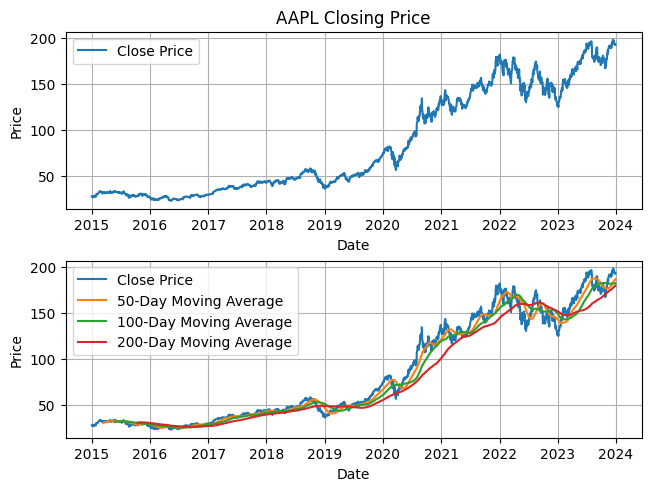

In [16]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(data['Close'], label='Close Price')
axs[0].set_title(f'{ticker} Closing Price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].grid(True)
axs[0].legend()

# Calculate moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA100'] = data['Close'].rolling(window=100).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Plot moving avergae
axs[1].plot(data['Close'], label='Close Price')
axs[1].plot(data['MA50'], label='50-Day Moving Average')
axs[1].plot(data['MA100'], label='100-Day Moving Average')
axs[1].plot(data['MA200'], label='200-Day Moving Average')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].grid(True)
axs[1].legend()
plt.show()

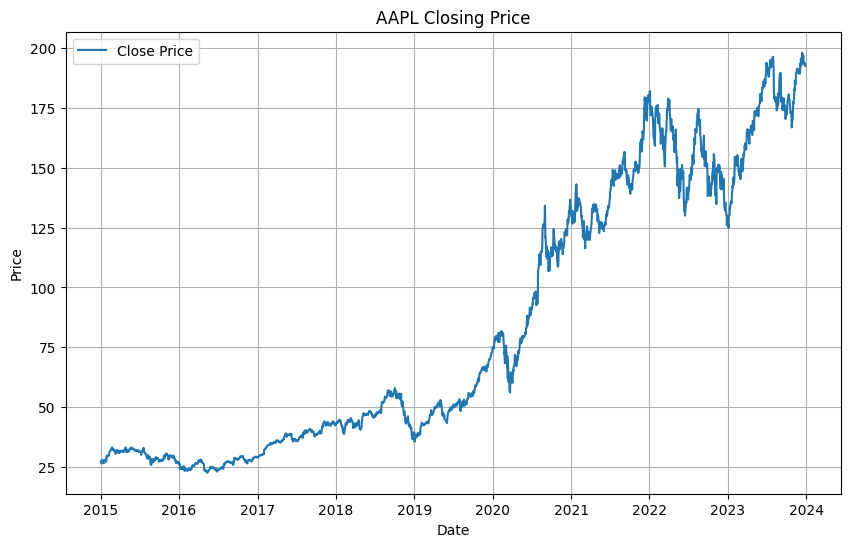

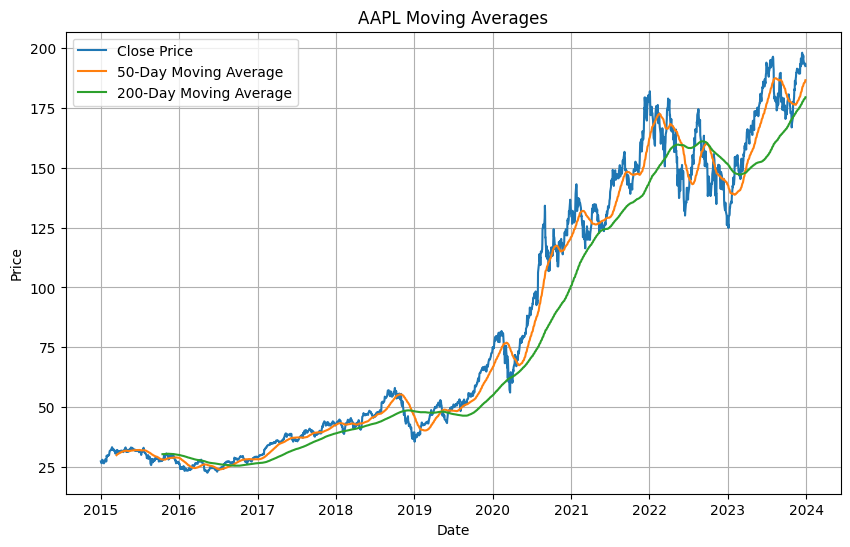

In [10]:
import matplotlib.pyplot as plt
# Plot the closing price
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.title(f'{ticker} Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid('on')
plt.show()

# Calculate moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA50'], label='50-Day Moving Average')
plt.plot(data['MA200'], label='200-Day Moving Average')
plt.title(f'{ticker} Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid('on')
plt.show()

**Step 3: Model Selection and Training**

We will create features and labels, split the data into training and testing sets, and train a linear regression model.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create features and labels
data['Future Close'] = data['Close'].shift(-1)
data.dropna(inplace=True)

X = data[['Close', 'MA50', 'MA200']]
y = data['Future Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Step 4: Model Evaluation**

Evaluate the model's performance using RMSE and visualize the predictions.

Root Mean Squared Error: 2.723658319845802


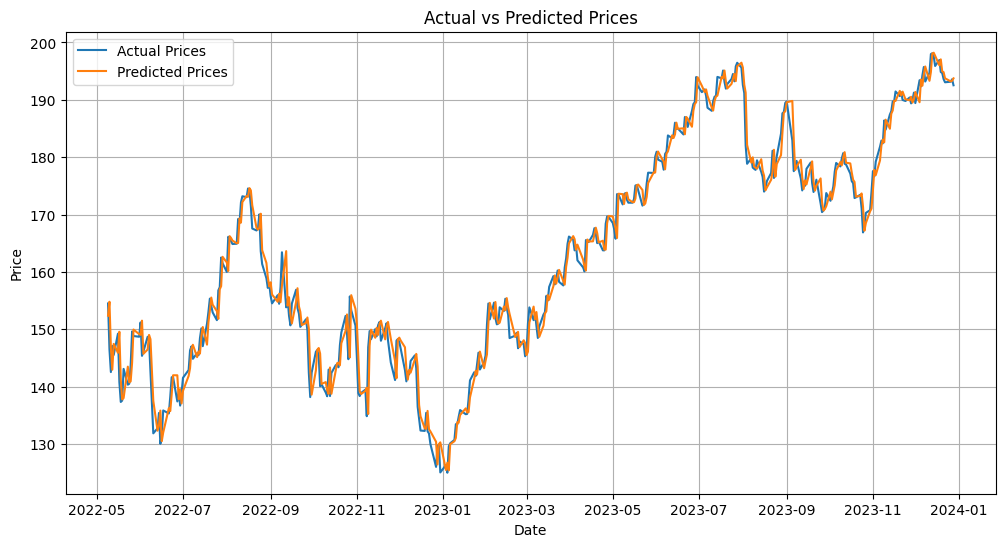

In [19]:
# Make predictions
predictions = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error: {rmse}')

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, predictions, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid('on')
plt.legend()
plt.show()

**Step 5: Model Deployment**

For deployment, you would typically save the model and create a function to load and use the model for future predictions. Here's a simple example of how to save and load the model.

Root Mean Squared Error: 2.723658319845803


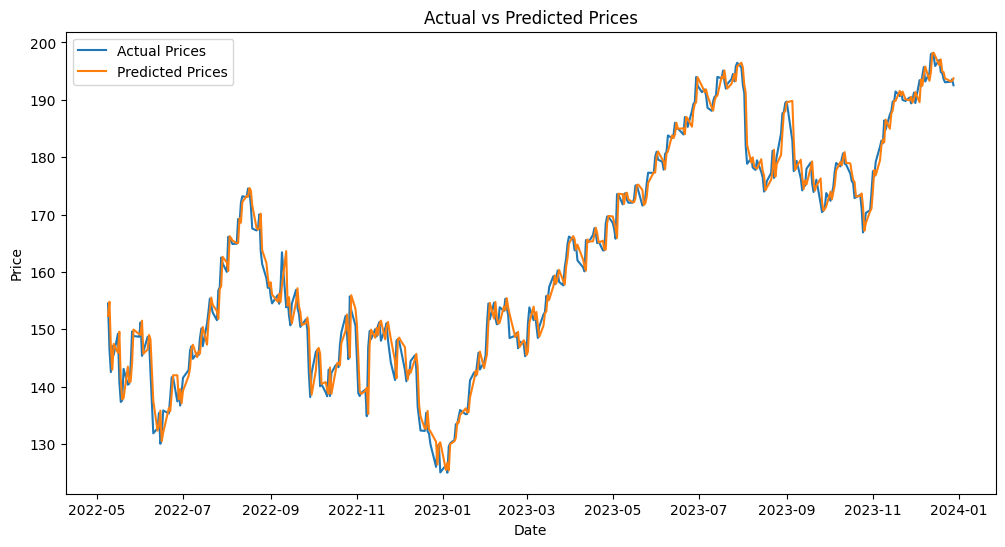

In [12]:
# Make predictions
predictions = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error: {rmse}')

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, predictions, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid('on')
plt.show()

In [13]:
import joblib

# Save the model
joblib.dump(model, 'stock_price_model.pkl')

# Load the model
loaded_model = joblib.load('stock_price_model.pkl')

# Predict future stock price
def predict_future_price(model, data):
    X_new = data[['Close', 'MA50', 'MA200']].iloc[-1].values.reshape(1, -3)
    return model.predict(X_new)

# Example prediction
future_price = predict_future_price(loaded_model, data)
print(f'Predicted Future Price: {future_price[0]}')

Predicted Future Price: 193.73635058459604


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Conclusion**

This example provides a basic framework for using machine learning to analyze financial reports and predict stock prices. Depending on the complexity and requirements of your analysis, you can extend this framework by incorporating more sophisticated models, additional features, and more advanced data preprocessing techniques.